In [2]:
# Importing the necessary Packages.
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,mean_absolute_error
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.manifold import TSNE
from scipy.ndimage import interpolation as inter
from sklearn.linear_model import LogisticRegression
from scipy.stats import norm
from scipy.stats import multivariate_normal as mvn
from future.utils import iteritems
import scipy.optimize as op 
import seaborn as sn

In [3]:
# Reading the dataset using Tensor Flow and keras.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

train_filter = np.where((y_train == 0 ) | (y_train == 8))
test_filter = np.where((y_test == 0) | (y_test == 8))

X_train, Y_train = x_train[train_filter], y_train[train_filter]
X_test, Y_test = x_test[test_filter], y_test[test_filter]

In [4]:
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

### **SVD**

In [5]:
svd_sk = TruncatedSVD(n_components=2)
svd_sk.fit(X_train)
x_train_svd = svd_sk.transform(X_train)
x_test_svd = svd_sk.transform(X_test)


clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)

clf.fit(x_train_svd, Y_train)
y_svd = clf.predict(x_test_svd)

print(classification_report(Y_test,y_svd))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       980
           8       0.95      0.97      0.96       974

    accuracy                           0.96      1954
   macro avg       0.96      0.96      0.96      1954
weighted avg       0.96      0.96      0.96      1954



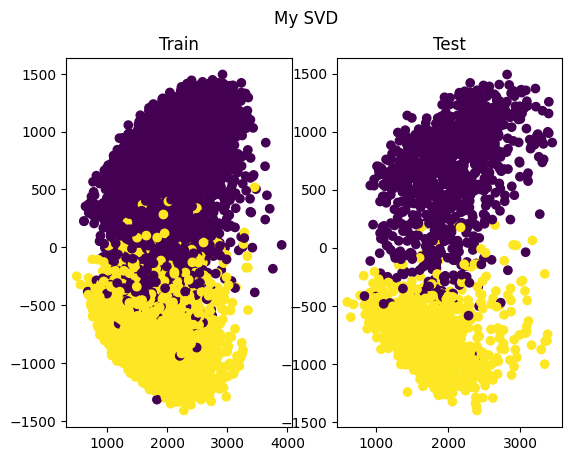

In [6]:
figure, (ax1, ax2) = plt.subplots(1,2)
figure.suptitle('SVD')
ax1.scatter(x_train_svd[:,0],x_train_svd[:,1], c = Y_train)
ax1.set_title('Train')
ax2.scatter(x_test_svd[:,0],x_test_svd[:,1], c = Y_test)
ax2.set_title('Test')
plt.show()

### **PCA**

In [7]:
pca_sk = PCA(n_components=2)
pca_sk.fit(X_train)
x_train_pca = pca_sk.transform(X_train)
x_test_pca = pca_sk.transform(X_test)


clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)

clf.fit(x_train_svd, Y_train)
y_pca = clf.predict(x_test_svd)

print(classification_report(Y_test,y_pca))


              precision    recall  f1-score   support

           0       0.96      0.95      0.96       980
           8       0.95      0.97      0.96       974

    accuracy                           0.96      1954
   macro avg       0.96      0.96      0.96      1954
weighted avg       0.96      0.96      0.96      1954



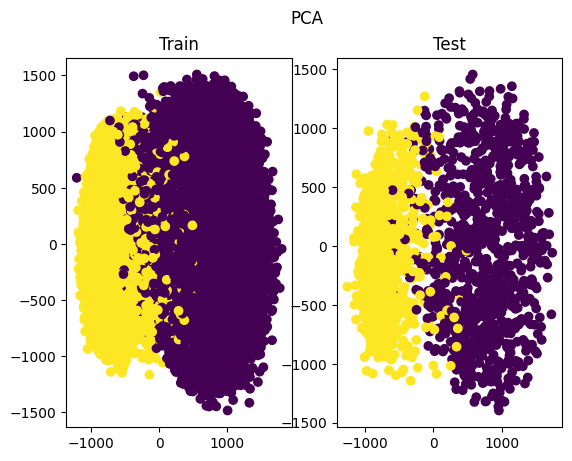

In [8]:
figure, (ax1, ax2) = plt.subplots(1,2)
figure.suptitle('PCA')
ax1.scatter(x_train_pca[:,0],x_train_pca[:,1], c = Y_train)
ax1.set_title('Train')
ax2.scatter(x_test_pca[:,0],x_test_pca[:,1], c = Y_test)
ax2.set_title('Test')
plt.show()

### **T-SNE**

In [9]:
tsne_sk = TSNE(n_components=2)
tsne_sk.fit(X_train)
x_train_tsne = tsne_sk.fit_transform(X_train)
x_test_tsne = tsne_sk.fit_transform(X_test)


clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)

clf.fit(x_train_tsne, Y_train)
y_tsne = clf.predict(x_test_tsne)

print(classification_report(Y_test,y_tsne))

C:\Users\Blues\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Blues\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Blues\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Blues\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:81

              precision    recall  f1-score   support

           0       0.01      0.01      0.01       980
           8       0.01      0.01      0.01       974

    accuracy                           0.01      1954
   macro avg       0.01      0.01      0.01      1954
weighted avg       0.01      0.01      0.01      1954



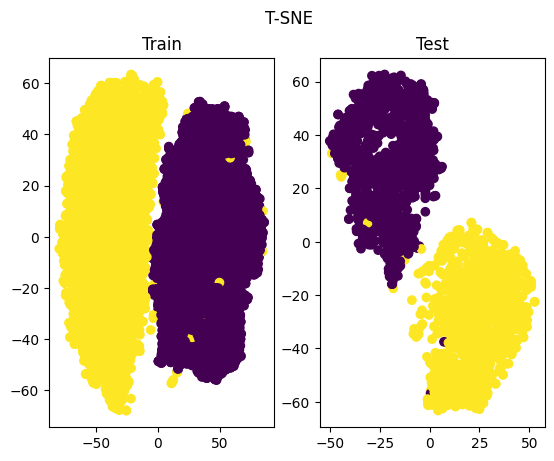

In [10]:
figure, (ax1, ax2) = plt.subplots(1,2)
figure.suptitle('T-SNE')
ax1.scatter(x_train_tsne[:,0],x_train_tsne[:,1], c = Y_train)
ax1.set_title('Train')
ax2.scatter(x_test_tsne[:,0],x_test_tsne[:,1], c = Y_test)
ax2.set_title('Test')
plt.show()